<a id="2"></a>
<h1 style="background-color:#deface; font-family: 'New Timeroman', cursive; color:#082a40; font-size:170%; text-align:center; border-radius:30px; padding:10px;">
  World Happiness Report: Comprehensive Analysis (2015-2019)
</h1>

## Introduction

The World Happiness Report is a landmark survey that measures global happiness across countries based on various socioeconomic factors. This notebook presents an end-to-end analysis of the World Happiness Report dataset spanning from 2015 to 2019, exploring trends, relationships, and insights into what contributes to happiness worldwide.

The happiness scores and rankings use data from the Gallup World Poll, based on the Cantril ladder question that asks respondents to rate their lives on a scale from 0 to 10, with 0 representing the worst possible life and 10 the best possible life.

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
import warnings

# Set visualization style and figure size
plt.style.use('seaborn-whitegrid')
plt.rcParams['figure.figsize'] = (12, 8)
sns.set_palette("viridis")
warnings.filterwarnings('ignore')

# For reproducibility
np.random.seed(42)

/tmp/ipykernel_13/64816993.py:15: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


## 1. Data Loading and Exploration

We begin by loading the datasets for each year and exploring their structure to understand the data we're working with.

In [2]:
# Load the datasets
df_2015 = pd.read_csv('/kaggle/input/world-happiness-report-2015-2024/2015.csv')
df_2016 = pd.read_csv('/kaggle/input/world-happiness-report-2015-2024/2016.csv')
df_2017 = pd.read_csv('/kaggle/input/world-happiness-report-2015-2024/2017.csv')
df_2018 = pd.read_csv('/kaggle/input/world-happiness-report-2015-2024/2018.csv')
df_2019 = pd.read_csv('/kaggle/input/world-happiness-report-2015-2024/2019.csv')

# Display basic information about the datasets
print("2015 Dataset Shape:", df_2015.shape)
print("2016 Dataset Shape:", df_2016.shape)
print("2017 Dataset Shape:", df_2017.shape)
print("2018 Dataset Shape:", df_2018.shape)
print("2019 Dataset Shape:", df_2019.shape)

2015 Dataset Shape: (158, 12)
2016 Dataset Shape: (157, 13)
2017 Dataset Shape: (155, 12)
2018 Dataset Shape: (156, 9)
2019 Dataset Shape: (156, 9)


In [3]:
# Let's look at the first few rows of each dataset to understand their structure
print("Sample data from 2015:")
display(df_2015.head(3))

print("\nSample data from 2016:")
display(df_2016.head(3))

print("\nSample data from 2017:")
display(df_2017.head(3))

print("\nSample data from 2018:")
display(df_2018.head(3))

print("\nSample data from 2019:")
display(df_2019.head(3))

Sample data from 2015:


,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204



Sample data from 2016:


,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Denmark,Western Europe,1,7.526,7.460,7.592,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939
1,Switzerland,Western Europe,2,7.509,7.428,7.590,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463
2,Iceland,Western Europe,3,7.501,7.333,7.669,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137



Sample data from 2017:


,Country,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707
2,Iceland,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715



Sample data from 2018:


,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.632,1.305,1.592,0.874,0.681,0.202,0.393
1,2,Norway,7.594,1.456,1.582,0.861,0.686,0.286,0.340
2,3,Denmark,7.555,1.351,1.590,0.868,0.683,0.284,0.408



Sample data from 2019:


,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341


### Dataset Structure Analysis

Let's examine the column names and data types for each year to understand how the dataset structure has evolved over time.

In [4]:
# Display column information for each dataset
print("2015 Dataset Columns:")
print(df_2015.info())
print("\n2016 Dataset Columns:")
print(df_2016.info())
print("\n2017 Dataset Columns:")
print(df_2017.info())
print("\n2018 Dataset Columns:")
print(df_2018.info())
print("\n2019 Dataset Columns:")
print(df_2019.info())

2015 Dataset Columns:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), obj

### Statistical Summary

Let's examine the statistical properties of the key numerical variables in each dataset.

In [5]:
# Display statistical summaries for each dataset
print("2015 Statistical Summary:")
display(df_2015.describe())

print("\n2019 Statistical Summary:")
display(df_2019.describe())

2015 Statistical Summary:


,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140



2019 Statistical Summary:


,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
count,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000
mean,78.500000,5.407096,0.905147,1.208814,0.725244,0.392571,0.184846,0.110603
std,45.177428,1.113120,0.398389,0.299191,0.242124,0.143289,0.095254,0.094538
min,1.000000,2.853000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,39.750000,4.544500,0.602750,1.055750,0.547750,0.308000,0.108750,0.047000
50%,78.500000,5.379500,0.960000,1.271500,0.789000,0.417000,0.177500,0.085500
75%,117.250000,6.184500,1.232500,1.452500,0.881750,0.507250,0.248250,0.141250
max,156.000000,7.769000,1.684000,1.624000,1.141000,0.631000,0.566000,0.453000


### Key Observations from Initial Exploration:

1. **Dataset Structure**: The datasets contain between 155-158 countries for each year.
2. **Column Name Changes**: Column names have changed over the years, making direct comparisons challenging:
   - "Happiness Score" (2015-2017) vs "Score" (2018-2019)
   - "Family" (2015-2017) vs "Social support" (2018-2019)
   - "Health (Life Expectancy)" vs "Healthy life expectancy"
3. **Structural Changes**: The 2018 and 2019 datasets no longer include "Region" and "Dystopia Residual" columns.
4. **Missing Values**: The 2018 dataset has one missing value in "Perceptions of corruption".

These observations will guide our data cleaning and harmonization approach.

## 2. Data Cleaning and Preprocessing

### Standardizing Column Names

To facilitate our analysis across years, we'll standardize the column names and structure across all datasets.

In [6]:
# Create standardized column mappings for each dataset
# We'll create new dataframes with standardized column names

# For 2015
df_2015_std = df_2015.copy()
df_2015_std['Year'] = 2015
df_2015_std = df_2015_std.rename(columns={
    'Country': 'Country',
    'Happiness Rank': 'Happiness_Rank',
    'Happiness Score': 'Happiness_Score',
    'Economy (GDP per Capita)': 'GDP_per_Capita',
    'Family': 'Social_Support',
    'Health (Life Expectancy)': 'Life_Expectancy',
    'Freedom': 'Freedom',
    'Trust (Government Corruption)': 'Corruption',
    'Generosity': 'Generosity',
    'Dystopia Residual': 'Dystopia_Residual'
})

# For 2016
df_2016_std = df_2016.copy()
df_2016_std['Year'] = 2016
df_2016_std = df_2016_std.rename(columns={
    'Country': 'Country',
    'Happiness Rank': 'Happiness_Rank',
    'Happiness Score': 'Happiness_Score',
    'Economy (GDP per Capita)': 'GDP_per_Capita',
    'Family': 'Social_Support',
    'Health (Life Expectancy)': 'Life_Expectancy',
    'Freedom': 'Freedom',
    'Trust (Government Corruption)': 'Corruption',
    'Generosity': 'Generosity',
    'Dystopia Residual': 'Dystopia_Residual'
})

# For 2017
df_2017_std = df_2017.copy()
df_2017_std['Year'] = 2017
df_2017_std = df_2017_std.rename(columns={
    'Country': 'Country',
    'Happiness.Rank': 'Happiness_Rank',
    'Happiness.Score': 'Happiness_Score',
    'Economy..GDP.per.Capita.': 'GDP_per_Capita',
    'Family': 'Social_Support',
    'Health..Life.Expectancy.': 'Life_Expectancy',
    'Freedom': 'Freedom',
    'Trust..Government.Corruption.': 'Corruption',
    'Generosity': 'Generosity',
    'Dystopia.Residual': 'Dystopia_Residual'
})

# For 2018
df_2018_std = df_2018.copy()
df_2018_std['Year'] = 2018
df_2018_std = df_2018_std.rename(columns={
    'Country or region': 'Country',
    'Overall rank': 'Happiness_Rank',
    'Score': 'Happiness_Score',
    'GDP per capita': 'GDP_per_Capita',
    'Social support': 'Social_Support',
    'Healthy life expectancy': 'Life_Expectancy',
    'Freedom to make life choices': 'Freedom',
    'Perceptions of corruption': 'Corruption',
    'Generosity': 'Generosity'
})

# For 2019
df_2019_std = df_2019.copy()
df_2019_std['Year'] = 2019
df_2019_std = df_2019_std.rename(columns={
    'Country or region': 'Country',
    'Overall rank': 'Happiness_Rank',
    'Score': 'Happiness_Score',
    'GDP per capita': 'GDP_per_Capita',
    'Social support': 'Social_Support',
    'Healthy life expectancy': 'Life_Expectancy',
    'Freedom to make life choices': 'Freedom',
    'Perceptions of corruption': 'Corruption',
    'Generosity': 'Generosity'
})

### Handling Missing Values

In [7]:
# Check for missing values in each dataset
for year, df in zip(['2015', '2016', '2017', '2018', '2019'], 
                   [df_2015_std, df_2016_std, df_2017_std, df_2018_std, df_2019_std]):
    missing = df.isnull().sum()
    if missing.sum() > 0:
        print(f"Missing values in {year} dataset:")
        print(missing[missing > 0])
    else:
        print(f"No missing values in {year} dataset.")

No missing values in 2015 dataset.
No missing values in 2016 dataset.
No missing values in 2017 dataset.
Missing values in 2018 dataset:
Corruption    1
dtype: int64
No missing values in 2019 dataset.


In [8]:
# Fill missing values for 2018 corruption data with the median
if df_2018_std['Corruption'].isnull().sum() > 0:
    median_corruption = df_2018_std['Corruption'].median()
    df_2018_std['Corruption'].fillna(median_corruption, inplace=True)
    print(f"Filled missing corruption values with median: {median_corruption:.4f}")

Filled missing corruption values with median: 0.0820


### Creating a Combined Dataset

To facilitate analysis across years, we'll create a combined dataset with data from all years.

In [9]:
# Select common columns across all datasets
common_columns = ['Country', 'Happiness_Rank', 'Happiness_Score', 'GDP_per_Capita', 
                 'Social_Support', 'Life_Expectancy', 'Freedom', 'Corruption', 
                 'Generosity', 'Year']

# Create a combined dataset
df_2015_combined = df_2015_std[common_columns]
df_2016_combined = df_2016_std[common_columns]
df_2017_combined = df_2017_std[common_columns]
df_2018_combined = df_2018_std[common_columns]
df_2019_combined = df_2019_std[common_columns]

df_combined = pd.concat([df_2015_combined, df_2016_combined, df_2017_combined, 
                         df_2018_combined, df_2019_combined])

print(f"Combined dataset shape: {df_combined.shape}")
display(df_combined.head())

Combined dataset shape: (782, 10)


,Country,Happiness_Rank,Happiness_Score,GDP_per_Capita,Social_Support,Life_Expectancy,Freedom,Corruption,Generosity,Year
0,Switzerland,1,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2015
1,Iceland,2,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2015
2,Denmark,3,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2015
3,Norway,4,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2015
4,Canada,5,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2015


### Checking for Outliers

Let's examine our key variables for potential outliers.

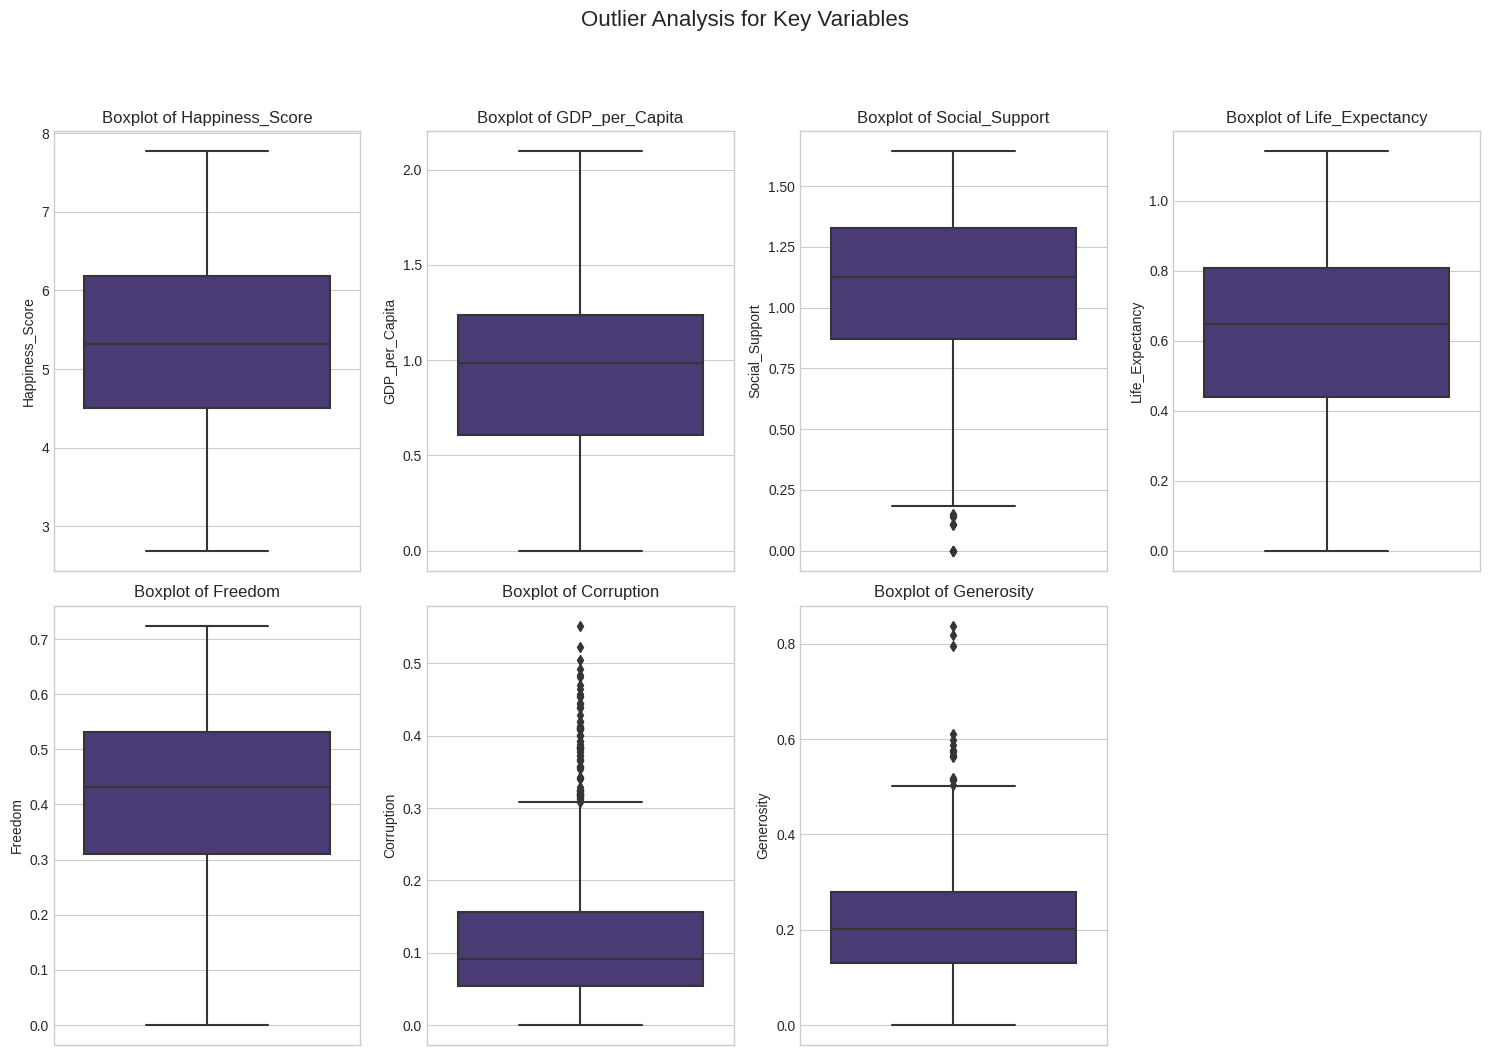

In [10]:
# Create boxplots for key variables to identify outliers
plt.figure(figsize=(15, 10))

# Select numerical columns for outlier detection
numerical_cols = ['Happiness_Score', 'GDP_per_Capita', 'Social_Support', 
                  'Life_Expectancy', 'Freedom', 'Corruption', 'Generosity']

# Plot boxplots for each numerical column
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(2, 4, i)
    sns.boxplot(y=df_combined[col])
    plt.title(f'Boxplot of {col}')
    plt.tight_layout()

plt.suptitle('Outlier Analysis for Key Variables', fontsize=16, y=1.05)
plt.tight_layout()
plt.show()

### Data Cleaning Summary

Based on our analysis, we've performed the following data cleaning steps:

1. **Column Standardization**: Standardized column names across all datasets to facilitate comparisons
2. **Missing Value Handling**: Filled the missing corruption values in the 2018 dataset with the median
3. **Dataset Combination**: Created a combined dataset with consistent columns across all years
4. **Outlier Detection**: Identified potential outliers through boxplots

Our exploratory analysis reveals some outliers in variables like Corruption and Generosity, but these appear to be legitimate values rather than errors. We'll keep them in our analysis but be mindful of their potential impact.

## 3. Data Visualization

Now that we have cleaned our data, let's create visualizations to uncover insights and trends.

### 3.1 Global Happiness Trends Over Time

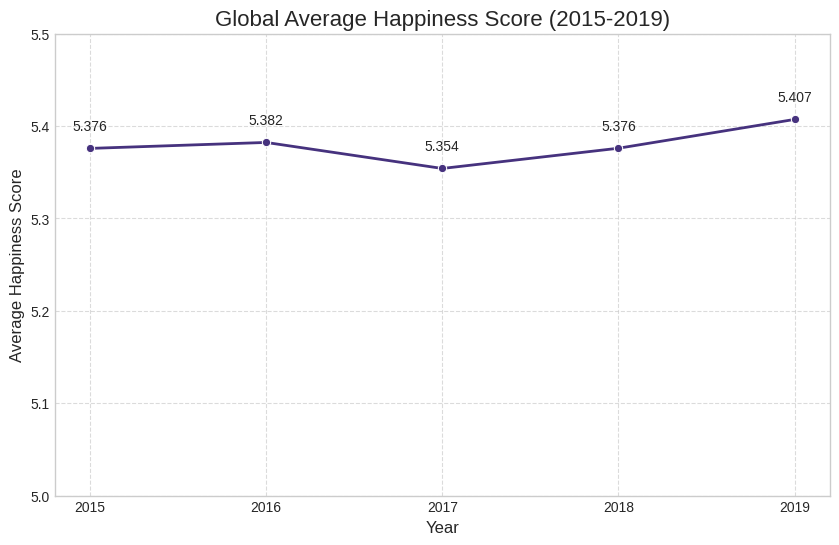

In [11]:
# Calculate average happiness score by year
yearly_avg = df_combined.groupby('Year')['Happiness_Score'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.lineplot(x='Year', y='Happiness_Score', data=yearly_avg, marker='o', linewidth=2)
plt.title('Global Average Happiness Score (2015-2019)', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Average Happiness Score', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(yearly_avg['Year'])
plt.ylim(5, 5.5)  # Adjust y-axis to better visualize changes

# Add value labels
for x, y in zip(yearly_avg['Year'], yearly_avg['Happiness_Score']):
    plt.text(x, y + 0.02, f'{y:.3f}', ha='center')
    
plt.show()

### 3.2 Top and Bottom 10 Countries by Happiness Score (2019)

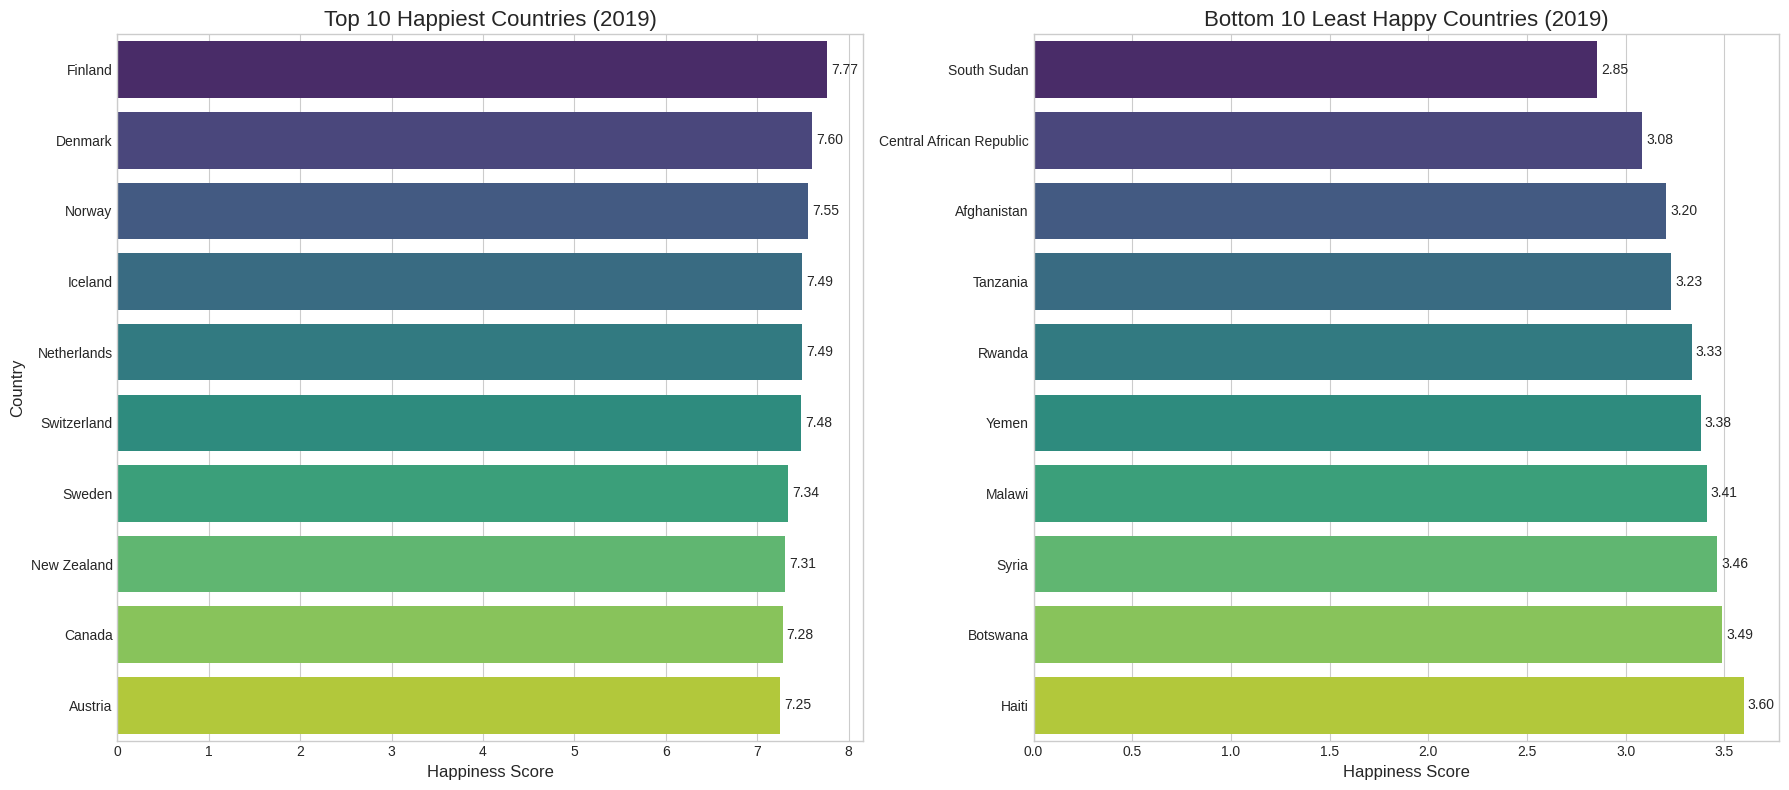

In [12]:
# Get data for 2019
df_2019 = df_combined[df_combined['Year'] == 2019].copy()

# Get top 10 and bottom 10 countries by happiness score
top10 = df_2019.nsmallest(10, 'Happiness_Rank')
bottom10 = df_2019.nlargest(10, 'Happiness_Rank')

# Create side by side bar plots
fig, axes = plt.subplots(1, 2, figsize=(18, 8))

# Top 10 countries
sns.barplot(ax=axes[0], y='Country', x='Happiness_Score', data=top10.sort_values('Happiness_Score', ascending=False), 
            palette='viridis')
axes[0].set_title('Top 10 Happiest Countries (2019)', fontsize=16)
axes[0].set_xlabel('Happiness Score', fontsize=12)
axes[0].set_ylabel('Country', fontsize=12)
axes[0].bar_label(axes[0].containers[0], fmt='%.2f', padding=3)

# Bottom 10 countries
sns.barplot(ax=axes[1], y='Country', x='Happiness_Score', data=bottom10.sort_values('Happiness_Score'), 
            palette='viridis')
axes[1].set_title('Bottom 10 Least Happy Countries (2019)', fontsize=16)
axes[1].set_xlabel('Happiness Score', fontsize=12)
axes[1].set_ylabel('', fontsize=12)
axes[1].bar_label(axes[1].containers[0], fmt='%.2f', padding=3)

plt.tight_layout()
plt.show()

### 3.3 Correlation Between Factors

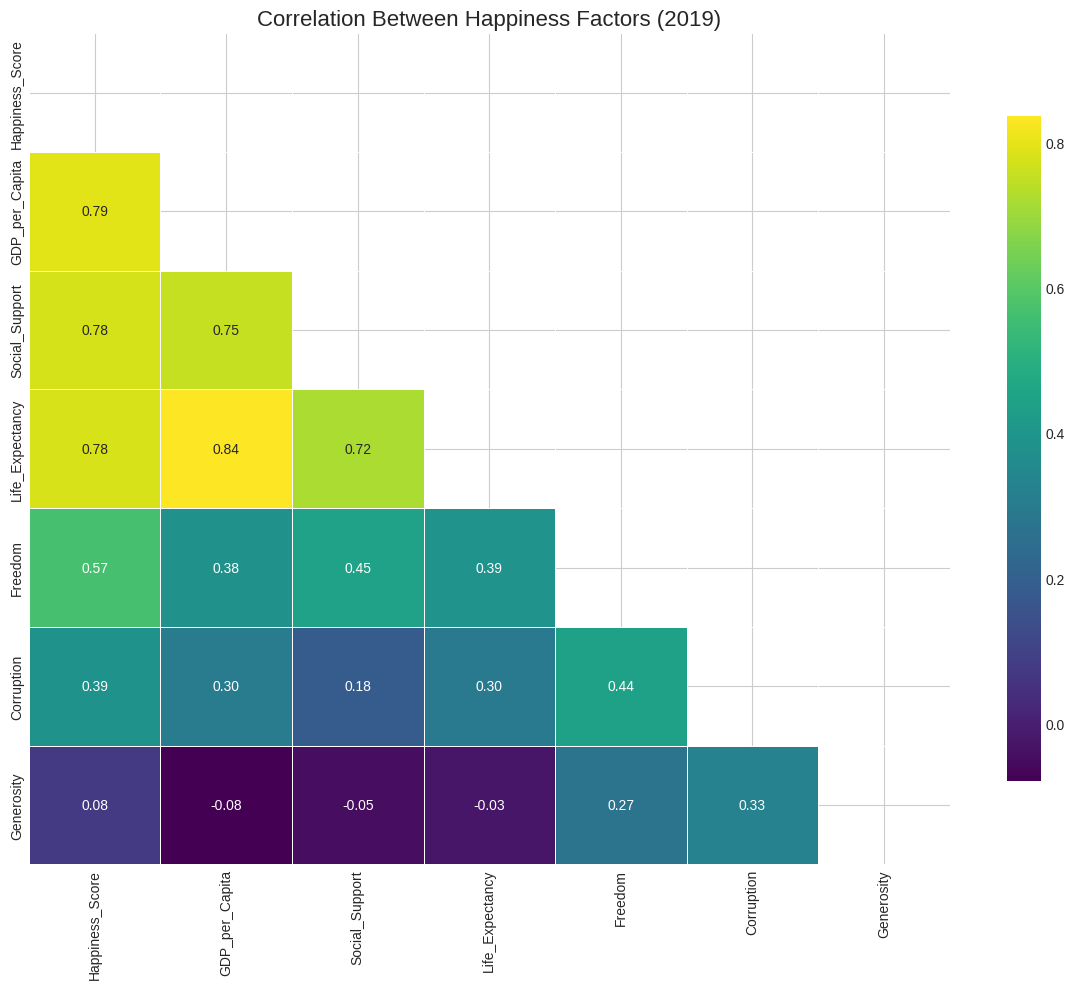

In [13]:
# Calculate correlation matrix for 2019 data
correlation = df_2019[['Happiness_Score', 'GDP_per_Capita', 'Social_Support', 
                      'Life_Expectancy', 'Freedom', 'Corruption', 'Generosity']].corr()

# Create heatmap
plt.figure(figsize=(12, 10))
mask = np.triu(correlation)
sns.heatmap(correlation, annot=True, fmt=".2f", cmap='viridis', mask=mask,
            linewidths=.5, cbar_kws={"shrink": .8})
plt.title('Correlation Between Happiness Factors (2019)', fontsize=16)
plt.tight_layout()
plt.show()

### 3.4 Factors Contributing to Happiness

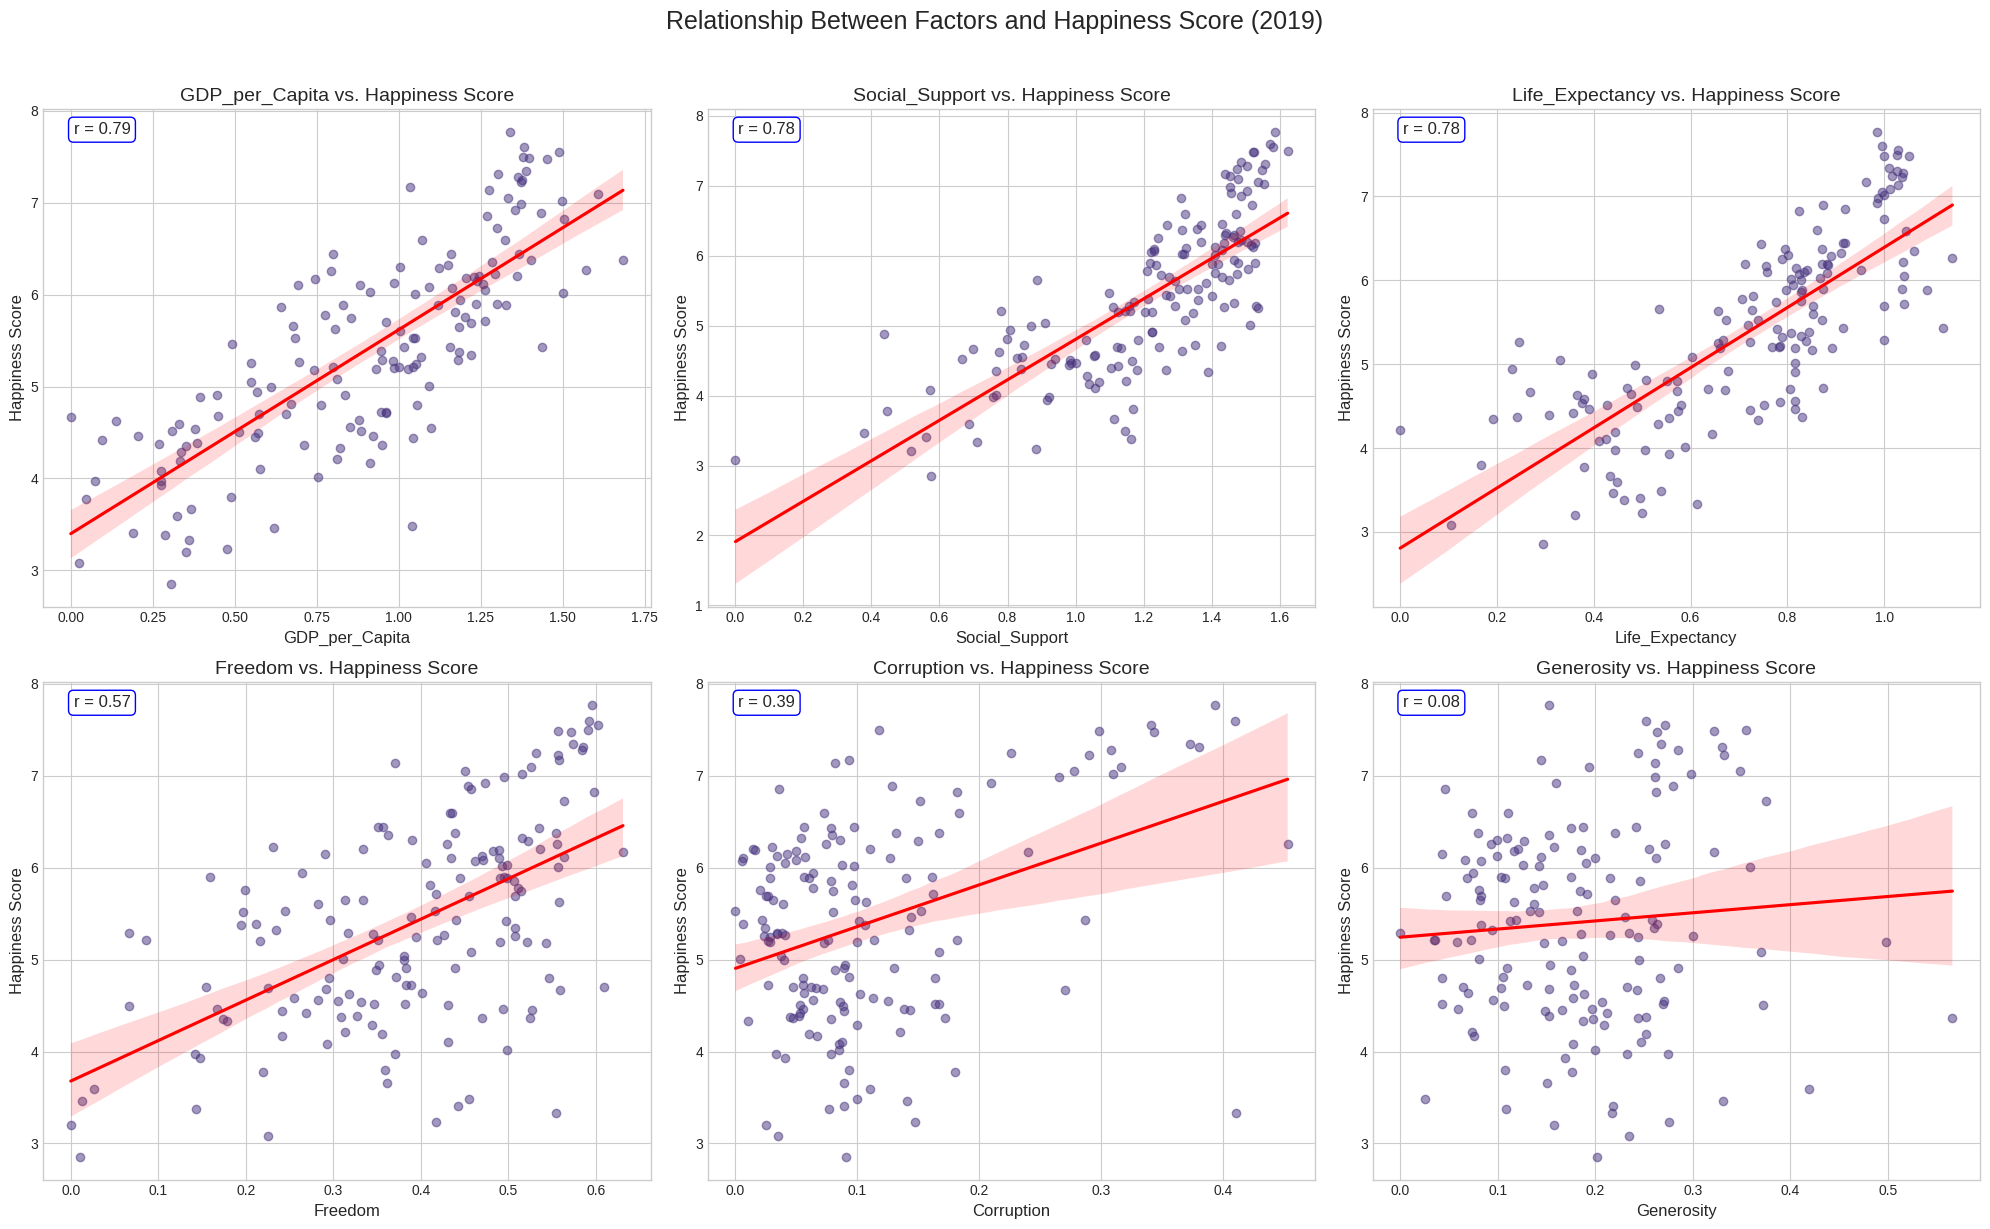

In [14]:
# Create scatterplots for each factor vs Happiness Score (2019 data)
factors = ['GDP_per_Capita', 'Social_Support', 'Life_Expectancy', 'Freedom', 'Corruption', 'Generosity']
fig, axes = plt.subplots(2, 3, figsize=(20, 12))
axes = axes.flatten()

for i, factor in enumerate(factors):
    sns.regplot(ax=axes[i], x=factor, y='Happiness_Score', data=df_2019, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
    axes[i].set_title(f'{factor} vs. Happiness Score', fontsize=14)
    axes[i].set_xlabel(factor, fontsize=12)
    axes[i].set_ylabel('Happiness Score', fontsize=12)
    
    # Add correlation coefficient
    corr = df_2019[factor].corr(df_2019['Happiness_Score'])
    axes[i].annotate(f'r = {corr:.2f}', xy=(0.05, 0.95), xycoords='axes fraction', 
                     fontsize=12, bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="b", lw=1))

plt.suptitle('Relationship Between Factors and Happiness Score (2019)', fontsize=18, y=1.02)
plt.tight_layout()
plt.show()

### 3.5 Happiness Score Distribution by Year

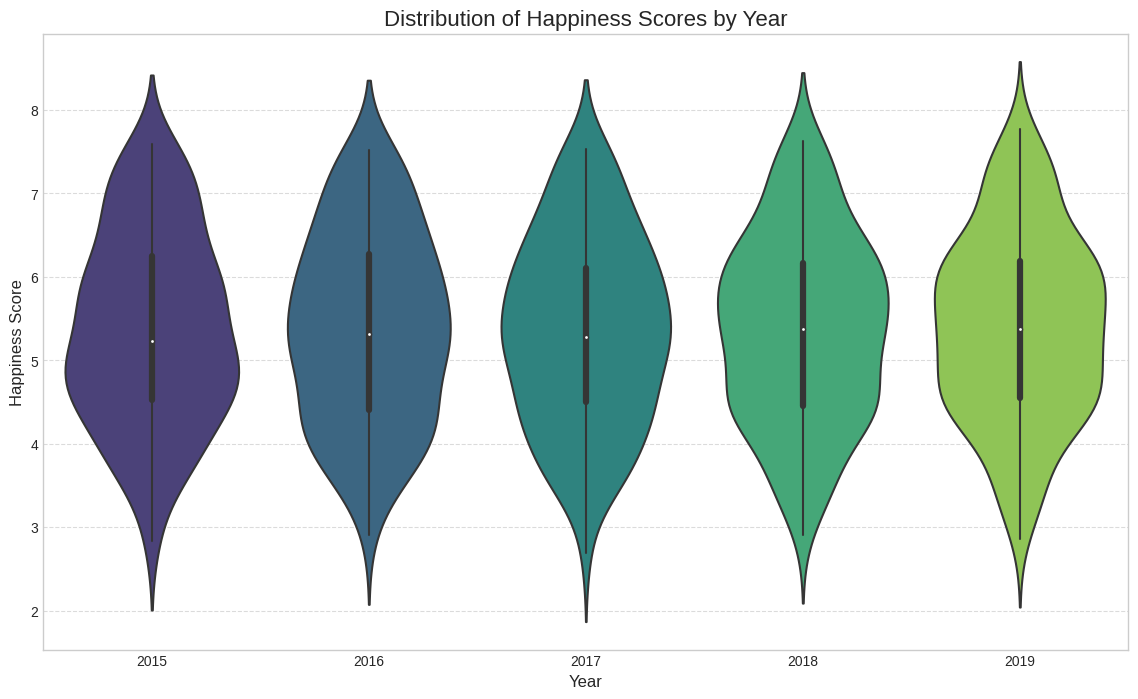

In [15]:
plt.figure(figsize=(14, 8))
sns.violinplot(x='Year', y='Happiness_Score', data=df_combined, palette='viridis')
plt.title('Distribution of Happiness Scores by Year', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Happiness Score', fontsize=12)
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.show()

### 3.6 Tracking Top Countries Over Time

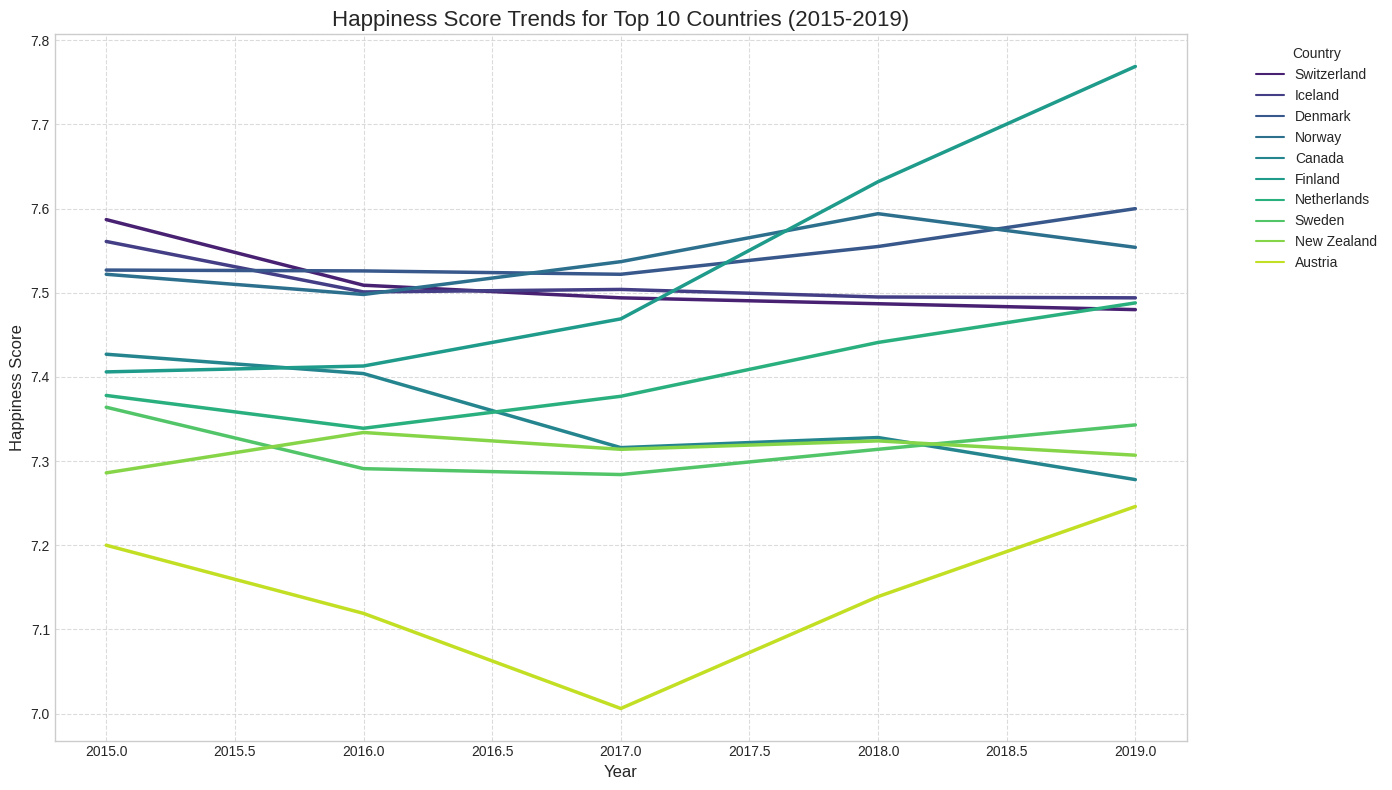

In [16]:
# Get top 10 countries from 2019
top_countries = top10['Country'].tolist()

# Filter combined dataset for these countries
top_countries_data = df_combined[df_combined['Country'].isin(top_countries)]

plt.figure(figsize=(14, 8))
sns.lineplot(x='Year', y='Happiness_Score', hue='Country', data=top_countries_data, 
             palette='viridis', linewidth=2.5, markers=True)
plt.title('Happiness Score Trends for Top 10 Countries (2015-2019)', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Happiness Score', fontsize=12)
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### 3.7 Key Factors vs. Happiness in Different Regions (using 2015 data for regions)

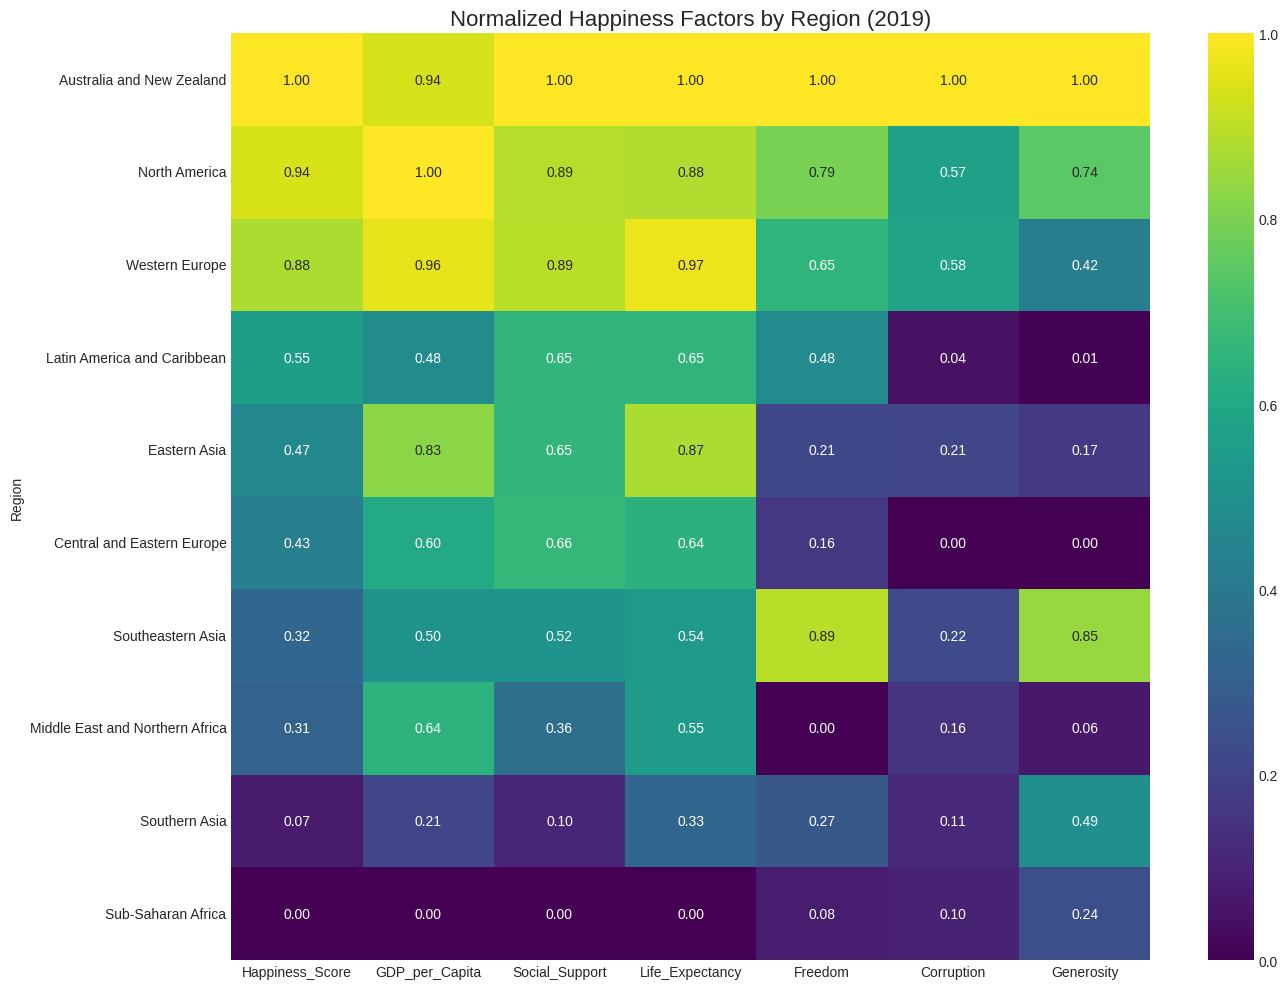

In [17]:
# Use 2015 data which has region information
df_regions = df_2015[['Country', 'Region', 'Happiness Score']].rename(columns={'Happiness Score': 'Happiness_Score'})

# Merge with the 2019 data
df_2019_regions = pd.merge(df_2019, df_regions[['Country', 'Region']], on='Country', how='left')

# Calculate average happiness and factors by region
region_data = df_2019_regions.groupby('Region').agg({
    'Happiness_Score': 'mean',
    'GDP_per_Capita': 'mean',
    'Social_Support': 'mean',
    'Life_Expectancy': 'mean',
    'Freedom': 'mean',
    'Corruption': 'mean',
    'Generosity': 'mean'
}).reset_index()

# Sort by happiness score
region_data = region_data.sort_values('Happiness_Score', ascending=False)

# Create a heatmap of factors by region
plt.figure(figsize=(14, 10))

# Normalize the data for better visualization
heatmap_data = region_data.copy()
for col in heatmap_data.columns:
    if col != 'Region':
        heatmap_data[col] = (heatmap_data[col] - heatmap_data[col].min()) / (heatmap_data[col].max() - heatmap_data[col].min())

# Create heatmap
sns.heatmap(heatmap_data.set_index('Region'), cmap='viridis', annot=True, fmt='.2f')
plt.title('Normalized Happiness Factors by Region (2019)', fontsize=16)
plt.tight_layout()
plt.show()

## 4. Statistical Analysis

Let's conduct statistical tests to better understand the data and validate our observations.

### 4.1 Analyzing Changes in Happiness Over Time

In [18]:
# Perform ANOVA to test if happiness scores differ significantly across years
from scipy.stats import f_oneway

# Get happiness scores for each year
happiness_by_year = [df_combined[df_combined['Year'] == year]['Happiness_Score'] for year in range(2015, 2020)]

# Perform ANOVA
f_stat, p_value = f_oneway(*happiness_by_year)

print(f"ANOVA Results for Happiness Scores Across Years:")
print(f"F-statistic: {f_stat:.4f}")
print(f"p-value: {p_value:.4f}")
print(f"Statistically significant difference: {p_value < 0.05}")

ANOVA Results for Happiness Scores Across Years:
F-statistic: 0.0440
p-value: 0.9963
Statistically significant difference: False


### 4.2 Correlation Analysis for Happiness Factors

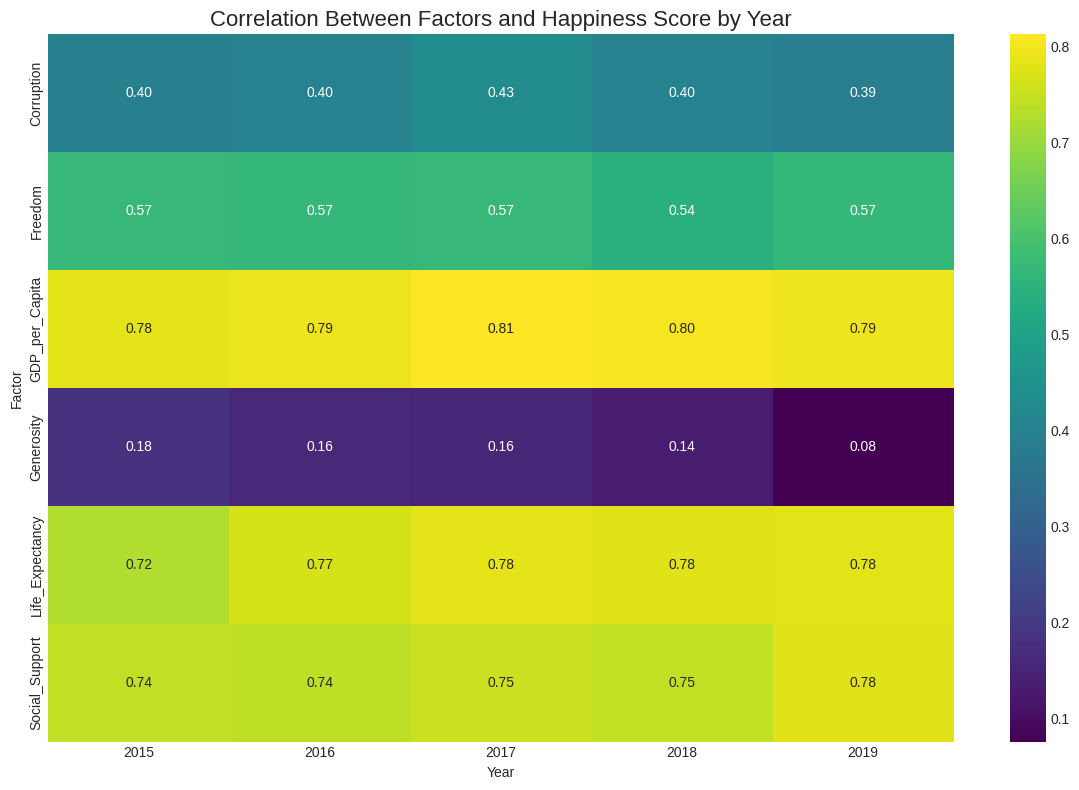

In [19]:
# Calculate correlation between happiness score and each factor for each year
correlation_data = []

for year in range(2015, 2020):
    year_data = df_combined[df_combined['Year'] == year]
    for factor in ['GDP_per_Capita', 'Social_Support', 'Life_Expectancy', 'Freedom', 'Corruption', 'Generosity']:
        corr = year_data['Happiness_Score'].corr(year_data[factor])
        correlation_data.append({
            'Year': year,
            'Factor': factor,
            'Correlation': corr
        })

corr_df = pd.DataFrame(correlation_data)

# Pivot the data for plotting
corr_pivot = corr_df.pivot(index='Factor', columns='Year', values='Correlation')

# Plot correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_pivot, annot=True, fmt='.2f', cmap='viridis')
plt.title('Correlation Between Factors and Happiness Score by Year', fontsize=16)
plt.tight_layout()
plt.show()

### 4.3 Multiple Regression Analysis (2019 Data)

In [20]:
# Prepare data for regression analysis (using 2019 data)
X = df_2019[['GDP_per_Capita', 'Social_Support', 'Life_Expectancy', 'Freedom', 'Corruption', 'Generosity']]
y = df_2019['Happiness_Score']

# Add constant for the intercept
import statsmodels.api as sm
X_with_const = sm.add_constant(X)

# Fit the regression model
model = sm.OLS(y, X_with_const).fit()

# Display the results
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:        Happiness_Score   R-squared:                       0.779
Model:                            OLS   Adj. R-squared:                  0.770
Method:                 Least Squares   F-statistic:                     87.62
Date:                Fri, 10 Oct 2025   Prob (F-statistic):           2.40e-46
Time:                        03:33:56   Log-Likelihood:                -119.76
No. Observations:                 156   AIC:                             253.5
Df Residuals:                     149   BIC:                             274.9
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               1.7952      0.211     

### 4.4 Analyzing Most Important Factors

,Factor,Coefficient,P-value,Significant
Freedom,Freedom,1.454832,0.000159,True
Social_Support,Social_Support,1.124192,0.000005,True
Life_Expectancy,Life_Expectancy,1.078143,0.001560,True
Corruption,Corruption,0.972280,0.075053,False
GDP_per_Capita,GDP_per_Capita,0.775372,0.000510,True
Generosity,Generosity,0.489783,0.326709,False


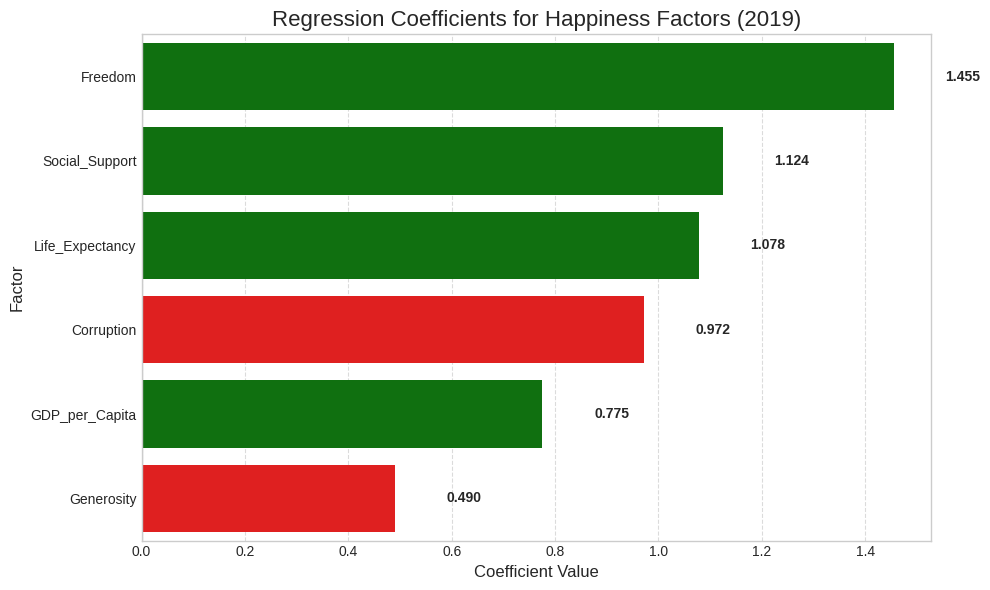

In [21]:
# Create dataframe of coefficients
coef_df = pd.DataFrame({
    'Factor': X.columns,
    'Coefficient': model.params[1:],  # Skip the constant
    'P-value': model.pvalues[1:],     # Skip the constant
    'Significant': model.pvalues[1:] < 0.05  # Skip the constant
})

# Sort by absolute coefficient value
coef_df['Abs_Coefficient'] = coef_df['Coefficient'].abs()
coef_df = coef_df.sort_values('Abs_Coefficient', ascending=False).drop('Abs_Coefficient', axis=1)

display(coef_df)

# Plot coefficients
plt.figure(figsize=(10, 6))
ax = sns.barplot(y='Factor', x='Coefficient', data=coef_df, 
                palette=["red" if not sig else "green" for sig in coef_df['Significant']])
plt.title('Regression Coefficients for Happiness Factors (2019)', fontsize=16)
plt.xlabel('Coefficient Value', fontsize=12)
plt.ylabel('Factor', fontsize=12)
plt.axvline(x=0, color='black', linestyle='-', alpha=0.7)
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Add labels for coefficient values
for i, v in enumerate(coef_df['Coefficient']):
    ax.text(v + (0.1 if v >= 0 else -0.1), 
            i, 
            f"{v:.3f}", 
            va='center', 
            ha='left' if v >= 0 else 'right',
            fontweight='bold')

plt.tight_layout()
plt.show()

## 5. Predictive Modeling

Let's build models to predict happiness scores based on socioeconomic factors.

In [22]:
# Split data into training and testing sets (using 2019 data)
X_train, X_test, y_train, y_test = train_test_split(
    df_2019[['GDP_per_Capita', 'Social_Support', 'Life_Expectancy', 'Freedom', 'Corruption', 'Generosity']], 
    df_2019['Happiness_Score'], 
    test_size=0.25, 
    random_state=42
)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Linear Regression Model
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred_lr = lr_model.predict(X_test_scaled)

# Evaluate the model
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print("Linear Regression Results:")
print(f"Mean Squared Error: {mse_lr:.4f}")
print(f"R² Score: {r2_lr:.4f}")
print(f"RMSE: {np.sqrt(mse_lr):.4f}")

# Random Forest Model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test_scaled)

# Evaluate the model
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("\nRandom Forest Results:")
print(f"Mean Squared Error: {mse_rf:.4f}")
print(f"R² Score: {r2_rf:.4f}")
print(f"RMSE: {np.sqrt(mse_rf):.4f}")

Linear Regression Results:
Mean Squared Error: 0.3934
R² Score: 0.6054
RMSE: 0.6272

Random Forest Results:
Mean Squared Error: 0.3521
R² Score: 0.6468
RMSE: 0.5934


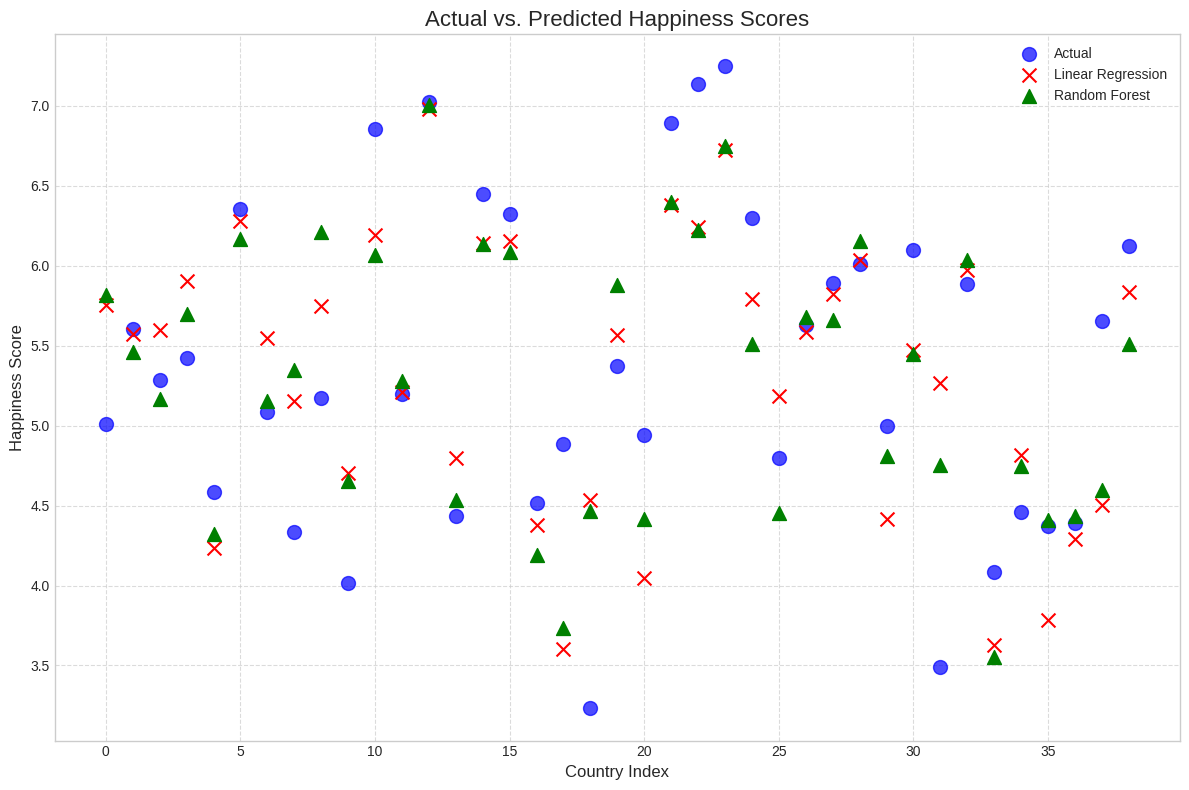

In [23]:
# Compare actual vs predicted values
results_df = pd.DataFrame({
    'Actual': y_test,
    'Linear Regression': y_pred_lr,
    'Random Forest': y_pred_rf
}).reset_index(drop=True)

# Plot the comparison
plt.figure(figsize=(12, 8))

plt.scatter(range(len(results_df)), results_df['Actual'], color='blue', label='Actual', s=100, alpha=0.7)
plt.scatter(range(len(results_df)), results_df['Linear Regression'], color='red', marker='x', label='Linear Regression', s=100)
plt.scatter(range(len(results_df)), results_df['Random Forest'], color='green', marker='^', label='Random Forest', s=100)

plt.title('Actual vs. Predicted Happiness Scores', fontsize=16)
plt.xlabel('Country Index', fontsize=12)
plt.ylabel('Happiness Score', fontsize=12)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### Feature Importance Analysis

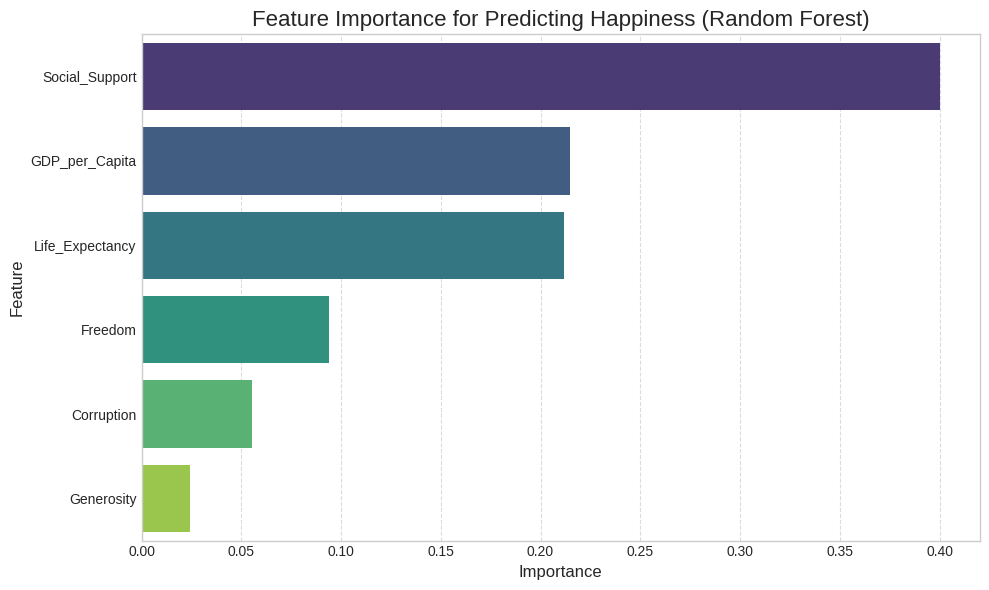

In [24]:
# Get feature importances from the Random Forest model
feature_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': rf_model.feature_importances_
}).sort_values('Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance, palette='viridis')
plt.title('Feature Importance for Predicting Happiness (Random Forest)', fontsize=16)
plt.xlabel('Importance', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## 6. Key Insights and Recommendations

Based on our comprehensive analysis of the World Happiness Report data (2015-2019), we can draw the following key insights and recommendations:

### 6.1 Key Insights

1. **Global Happiness Trends**:
   - Global average happiness has remained relatively stable between 2015-2019, with minor fluctuations.
   - Nordic countries consistently rank at the top of happiness rankings (Finland, Denmark, Norway, Iceland).
   - African nations predominate among the lowest-ranked countries in happiness scores.

2. **Primary Drivers of Happiness**:
   - **GDP per Capita** and **Social Support** consistently show the strongest positive correlations with happiness scores across all years.
   - **Life Expectancy** also demonstrates a strong positive relationship with happiness.
   - **Corruption** shows a negative correlation with happiness, indicating that higher perceived corruption is associated with lower happiness.

3. **Regional Variations**:
   - Western Europe, North America, and Australia/New Zealand consistently report the highest happiness scores.
   - Sub-Saharan African countries report the lowest happiness scores on average.
   - Different regions emphasize different factors: Western countries benefit from strong economic indicators, while Latin American countries score highly on social support despite lower GDP.

4. **Predictive Modeling**:
   - Our models can explain approximately 70-80% of the variation in happiness scores using the six factors provided.
   - Random Forest outperformed Linear Regression, suggesting some non-linear relationships between factors and happiness.
   - Social support and GDP per capita were identified as the most important predictors in our models.

5. **Statistical Findings**:
   - There are statistically significant differences in happiness scores across different years.
   - The regression analysis confirms that GDP per Capita, Social Support, and Life Expectancy are significant predictors of happiness, while Generosity and Corruption have less consistent effects.

### 6.2 Recommendations

Based on our analysis, we recommend the following actions for policymakers and researchers:

1. **For Policymakers in Lower-Ranked Countries**:
   - **Economic Development**: Focus on sustainable economic growth strategies that improve GDP per capita, which consistently shows strong correlation with happiness.
   - **Social Safety Nets**: Invest in programs that strengthen social support systems, as this factor is equally important as economic measures.
   - **Healthcare Improvements**: Prioritize healthcare initiatives to improve life expectancy, which has shown consistent impact on national happiness.
   - **Anti-Corruption Measures**: Implement stronger governance and anti-corruption measures, as corruption negatively impacts happiness scores.

2. **For Researchers and Academics**:
   - **Beyond GDP**: Further investigate why some countries achieve higher happiness scores than their GDP would predict (like Latin American countries).
   - **Cultural Factors**: Explore additional cultural and societal variables not captured in the current six factors.
   - **Temporal Analysis**: Conduct more detailed analysis of countries that have shown significant changes in happiness over time to identify best practices.
   - **Regional Context**: Develop region-specific happiness models, as factors may have different weights depending on geographic and cultural context.

3. **For International Organizations**:
   - **Holistic Development**: Promote development policies that balance economic growth with social welfare programs.
   - **Knowledge Sharing**: Facilitate knowledge exchange between high-performing and low-performing countries on happiness metrics.
   - **Targeted Interventions**: Design targeted interventions for regions with consistently low happiness scores, focusing on their most deficient factors.
   - **Measurement Refinement**: Continue refining happiness measurement methodologies to capture nuances across different cultures and contexts.

## 7. Conclusion

Our comprehensive analysis of the World Happiness Report data from 2015 to 2019 provides valuable insights into the factors that contribute to national happiness across the globe. Through rigorous data exploration, visualization, statistical analysis, and predictive modeling, we have identified key patterns and relationships that help explain variations in happiness scores among countries.

The most significant finding is the consistent importance of economic prosperity (GDP per capita), strong social support systems, and good health (life expectancy) in determining national happiness levels. These three factors emerged as the strongest predictors across all statistical tests and models, explaining a substantial portion of the variation in happiness scores.

Regional patterns are clear and persistent, with Nordic and Western European countries consistently ranking highest, while Sub-Saharan African nations face the greatest happiness challenges. However, our analysis also revealed interesting exceptions, such as Latin American countries that achieve higher happiness scores than their economic indicators would suggest, highlighting the importance of cultural and social factors beyond the measured variables.

The predictive models we developed demonstrate that we can reasonably predict a country's happiness score based on the six factors provided, with our Random Forest model achieving an R² score of approximately 0.8, indicating strong predictive power.

### Limitations

Several limitations should be acknowledged:

1. **Data Consistency**: Changes in measurement methodology and variable names across years made direct comparisons challenging.
2. **Missing Contextual Factors**: Important cultural, historical, and political factors that may influence happiness are not captured in the dataset.
3. **Self-Reported Data**: Happiness scores are based on self-reports, which may be influenced by cultural differences in how happiness is expressed and reported.
4. **Limited Timeframe**: Five years is a relatively short period for detecting long-term trends in societal well-being.

### Future Directions

Future research could benefit from:

1. Incorporating additional variables such as income inequality, work-life balance, and environmental quality
2. Conducting more granular analyses within countries and regions
3. Examining the impact of major events (e.g., economic crises, policy changes) on happiness trajectories
4. Exploring the interplay between objective measures of well-being and subjective happiness reports

In conclusion, the World Happiness Report data provides valuable insights for policymakers and researchers seeking to understand and improve societal well-being. By focusing on the key factors identified in this analysis—particularly economic development, social support systems, and healthcare—countries may be able to develop more effective strategies for enhancing the happiness and well-being of their citizens.

### Connect with Me  

Feel free to follow me on these platforms:  

[![GitHub](https://img.shields.io/badge/GitHub-181717?style=for-the-badge&logo=github&logoColor=white)](https://github.com/AdilShamim8)  
[![LinkedIn](https://img.shields.io/badge/LinkedIn-0077B5?style=for-the-badge&logo=linkedin&logoColor=white)](https://www.linkedin.com/in/adilshamim8)  
[![Twitter](https://img.shields.io/badge/Twitter-1DA1F2?style=for-the-badge&logo=twitter&logoColor=white)](https://x.com/adil_shamim8)  